# Pytorch basics

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Basic autograd example 1

In [2]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [3]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [5]:
y1 = torch.tensor(1., requires_grad=True)

In [6]:
y1.grad

# Basic autograd example 2

In [7]:
# Create tensors.
x = torch.randn(5, 3)
y = torch.randn(5, 2)

# Build a linear layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.2773, -0.0396,  0.4586],
        [ 0.0978, -0.3581, -0.1764]], requires_grad=True)
b:  Parameter containing:
tensor([0.3441, 0.4651], requires_grad=True)


In [8]:
# Forward propagation.
pred = linear(x)
print(pred)

tensor([[ 0.5113, -0.0705],
        [ 0.4701,  0.7327],
        [ 0.5102,  0.5950],
        [ 0.3280,  0.8065],
        [-0.3056,  1.2092]], grad_fn=<AddmmBackward>)


In [9]:
# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss)

loss:  tensor(1.6172, grad_fn=<MseLossBackward>)


In [10]:
# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.0381,  0.1562,  0.5579],
        [ 0.1110, -0.9731, -0.5821]])
dL/db:  tensor([0.6711, 0.9915])


In [33]:
# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.0265560150146484


# Load data from numpy

In [ ]:
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array

# Implementing the input pipeline

In [34]:
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='./data/',
                              train=True, 
                              transform=transforms.ToTensor(),
                              download=True)

In [35]:
# Select one data pair (read data from disk).
image, label = train_dataset[7]
print(image.size())
print(label)

torch.Size([3, 32, 32])
7


/home/gilles/anaconda3/envs/ggi/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


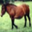

In [36]:
from scipy.misc import toimage
toimage(image)

In [ ]:
# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass

# Input pipeline for custom dataset

In [ ]:
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# Using pretrained model

In [39]:
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

In [40]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(resnet))

51300


In [41]:
# For test.
images = torch.randn(10, 3, 224, 224)
outputs = resnet(images)
print(outputs)  

tensor([[-1.1568e-01,  5.3433e-01,  7.4242e-01,  6.2981e-02,  2.3663e-01,
          5.6432e-01, -7.8718e-02, -2.9503e-01,  8.7011e-01, -1.3383e-02,
          1.0284e+00, -3.2181e-01, -8.1243e-01,  2.7487e-01, -6.5879e-01,
          6.7676e-01,  1.4149e-01,  1.8571e-03,  8.2447e-01, -1.1496e+00,
         -6.0994e-01, -6.2465e-01, -2.5588e-01,  6.1770e-01, -4.9594e-01,
          3.3104e-01,  3.0861e-01, -9.2243e-01,  4.8901e-01,  8.5883e-02,
          1.3050e+00,  4.7985e-02,  4.5465e-01, -2.4142e-02,  6.5557e-01,
          2.4600e-01,  2.4094e-01,  3.2962e-01,  4.0465e-01,  5.4254e-01,
         -1.0083e+00, -1.2786e+00,  2.4001e-01, -1.2375e+00, -7.5149e-02,
          7.6989e-01, -5.8451e-01,  6.0738e-01,  5.6997e-02,  4.1275e-01,
          1.2219e-01,  8.6224e-01, -6.8760e-01,  4.8097e-01,  8.9219e-01,
          2.8951e-01, -1.2494e+00, -4.4353e-02, -7.0654e-01, -7.4033e-01,
          1.9318e-01,  9.2329e-01,  1.1193e+00,  1.0030e-01,  8.9788e-01,
         -2.7936e-01, -7.9837e-01,  5.

# Save and load model

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))